# TASK 6 - Prediction Using Decision Tree Algorithm


**In this task, I will be creating a decision tree classifier on the Iris Data to predict the right class when we feed new data to this classifier.**

# Author:  Sandhika G

# Importing required libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [42]:
data = pd.read_csv("C:/Users/sandh/Downloads/Iris.csv")

In [43]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Pre- Processing

In [45]:
data.drop('Id',axis=1,inplace=True)

In [46]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [48]:
data.shape

(150, 5)

In [49]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data visualization

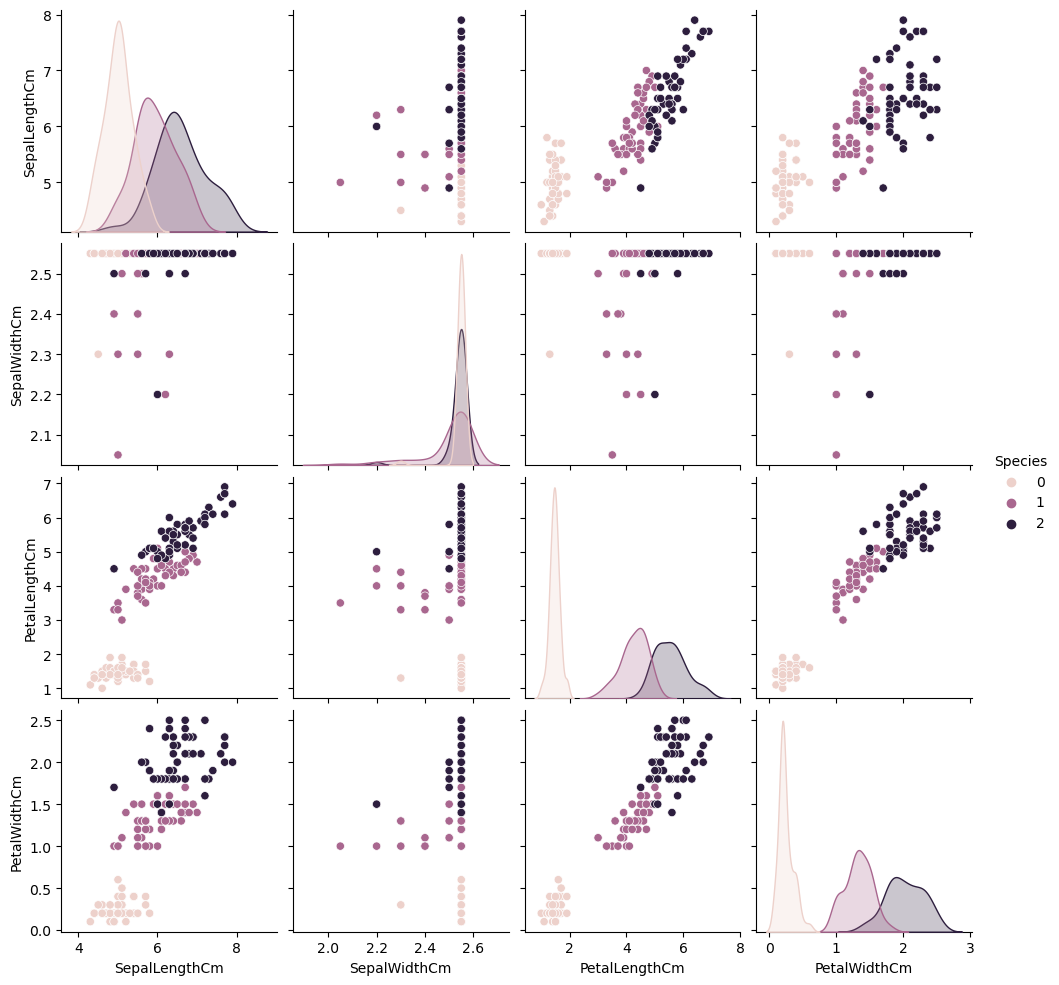

In [71]:
sns.pairplot(data,hue="Species")

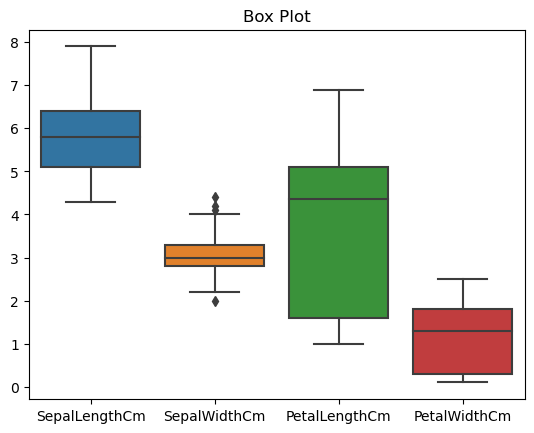

In [50]:
sns.boxplot(data=data)
plt.title("Box Plot")
plt.show()

# Removing outliers by Winsorizing Technique

In [51]:
def winsorize_column(col, lower_limit, upper_limit):
    col = np.where(col < lower_limit, lower_limit, col)
    col = np.where(col > upper_limit, upper_limit, col)
    return col

q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 - (1.5 * iqr)

data['SepalWidthCm'] = winsorize_column(data['SepalWidthCm'], lower_limit, upper_limit)

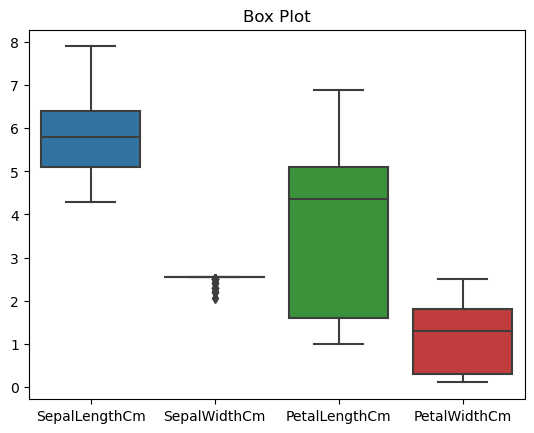

In [52]:
sns.boxplot(data=data)
plt.title("Box Plot")
plt.show()

In [53]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Encoding categorical Data

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
data[['Species']] = data[['Species']].apply(LabelEncoder().fit_transform)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,2.55,1.4,0.2,0
1,4.9,2.55,1.4,0.2,0
2,4.7,2.55,1.3,0.2,0
3,4.6,2.55,1.5,0.2,0
4,5.0,2.55,1.4,0.2,0


# Data Splitting

In [57]:
from sklearn.model_selection import train_test_split

X = data.drop(['Species'], axis = 1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# Decision Tree Model Building

In [58]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier()
output=cls.fit(X_train,y_train)

In [59]:
independent_variable = list(data.columns[0:4])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Visualizing Trained Model


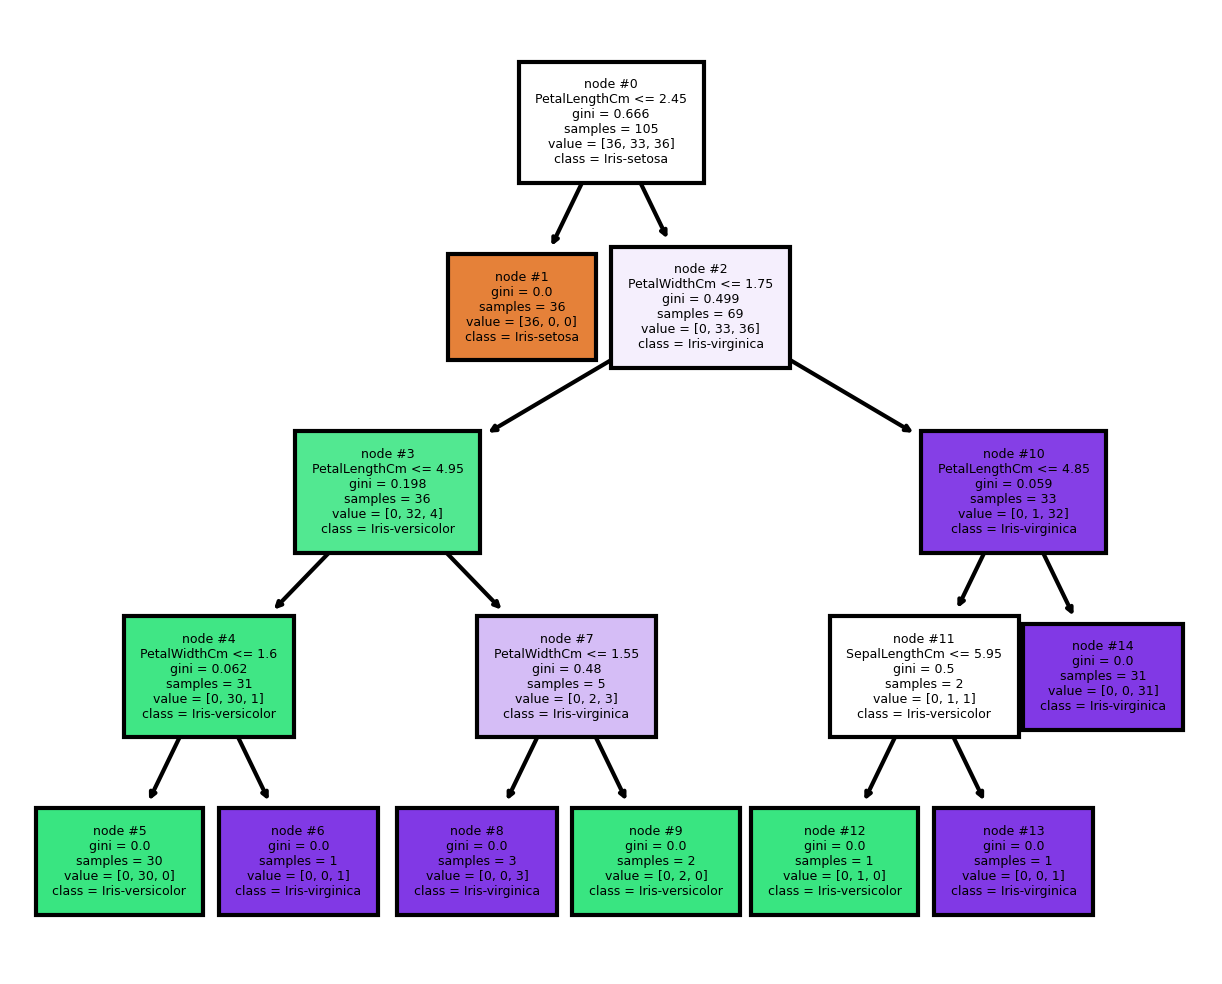

In [60]:
from sklearn import tree
import matplotlib.pyplot as plt

species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols =1,figsize = (5,4), dpi=300)
tree.plot_tree(output, feature_names = independent_variable, class_names = species, filled = True, node_ids = True, fontsize=3);

# Predicting the class output for some random values of petal and sepal length and width

In [68]:
print("Class Names = ",species)
print()
print("Estimating Class Probabilities for flower whose petals length & width are 1.6 cm & 0.7 cm and sepal length & width are 1.3cm & 0.2cm. ")
print()
print('Output = ',output.predict([[1.6,0.7,1.3,0.2]]))
print()
print("Our model predicts the class as 0, that is, Iris-setosa")

Class Names =  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Estimating Class Probabilities for flower whose petals length & width are 1.6 cm & 0.7 cm and sepal length & width are 1.3cm & 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, Iris-setosa


In [69]:
print("Class Names = ",species)
print()
print("Estimating Class Probabilities for flower whose petals length & width are 3.5 & 1.6 cm and sepal length & width are 5.8cm & 1.6cm. ")
print()
print('Output = ',output.predict([[3.5,1.6,5.8,1.6]]))
print()
print("Our model predicts the class as 1, that is, Iris-versicolor")

Class Names =  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Estimating Class Probabilities for flower whose petals length & width are 3.5 & 1.6 cm and sepal length & width are 5.8cm & 1.6cm. 

Output =  [1]

Our model predicts the class as 1, that is, Iris-versicolor


In [70]:
print("Class Names = ",species)
print()
print("Estimating Class Probabilities for flower whose petals length & width are 6.4 cm & 2.8 cm and sepal length & width are 5.6cm & 2.1cm. ")
print()
print('Output = ',output.predict([[6.4,2.8,5.6,2.1]]))
print()
print("Our model predicts the class as 2, that is, Iris-virginica")



Class Names =  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Estimating Class Probabilities for flower whose petals length & width are 6.4 cm & 2.8 cm and sepal length & width are 5.6cm & 2.1cm. 

Output =  [2]

Our model predicts the class as 2, that is, Iris-virginica


# Conclusion

**THEREFORE,THIS MODEL WILL PREDICT THE CLASS OF ANY NEWLY ENTERED DATA ACCORDINGLY**